In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

userdata = pd.read_csv('userdata.csv')
orderdata = pd.read_csv('orderdata.csv')
interactiondata = pd.read_csv('interactiondata.csv')
ae = [
    'complain_count',
    'discount_purchases_count_avg',
    'catalogue_purchases_count_avg',
    'store_purchases_count_avg',
    'website_purchases_count_avg',
    'website_visit_count_avg',
    'mobile_purchases_count_avg',
    'mobile_visit_count_avg',
    'marketing_company_outcome_1',
    'marketing_company_outcome_2',
    'marketing_company_outcome_3',
    'marketing_company_outcome_4',
    'marketing_company_outcome_5'
]
interactiondata = interactiondata[(interactiondata[ae] >= 0).all(axis=1)]

merged_data = pd.merge(userdata, interactiondata, on='userId', how='inner')
merged_data = pd.merge(merged_data, orderdata, on='userId', how='inner')
merged_data = merged_data.dropna()
print(merged_data['avg_bill'])


0         144.0
1        1200.0
2        1289.0
3        1430.0
5        1312.0
          ...  
21799     570.0
21800    2140.0
21801     864.0
21802    1267.0
21804    1181.0
Name: avg_bill, Length: 18670, dtype: float64


In [43]:
merged_data.head()

,userId,join_datetime,age,income,kids,teenagers,marital,education,complain_count,last_order_dt,...,website_visit_count_avg,mobile_purchases_count_avg,mobile_visit_count_avg,marketing_company_outcome_1,marketing_company_outcome_2,marketing_company_outcome_3,marketing_company_outcome_4,marketing_company_outcome_5,category,avg_bill
0,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,2024-07-04,...,5,17,31,1,0,0,0,0,sweets,144.0
1,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,2024-07-04,...,5,17,31,1,0,0,0,0,fruits,1200.0
2,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,2024-07-04,...,5,17,31,1,0,0,0,0,vegetables,1289.0
3,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,2024-07-04,...,5,17,31,1,0,0,0,0,other,1430.0
5,35821e5c-cc2a-425c-a270-5377de69177c,2023-12-25 14:09:54,71,107793.0,0,1,married,masters,0,2024-07-04,...,5,17,31,1,0,0,0,0,alcohol,1312.0


In [44]:
print(merged_data.describe())

                age         income          kids     teenagers  \
count  18670.000000   18670.000000  18670.000000  18670.000000   
mean      39.242742   64297.419443      0.302410      0.345153   
std       19.364857   31349.351068      0.491646      0.510946   
min       11.000000   25500.000000      0.000000      0.000000   
25%       18.000000   26965.000000      0.000000      0.000000   
50%       43.000000   64771.000000      0.000000      0.000000   
75%       55.000000   83025.000000      1.000000      1.000000   
max       80.000000  273672.000000      2.000000      2.000000   

       complain_count  discount_purchases_count_avg  \
count    18670.000000                  18670.000000   
mean         0.573380                      3.492608   
std          0.813044                      4.645667   
min          0.000000                      0.000000   
25%          0.000000                      1.000000   
50%          0.000000                      2.000000   
75%          1.00000

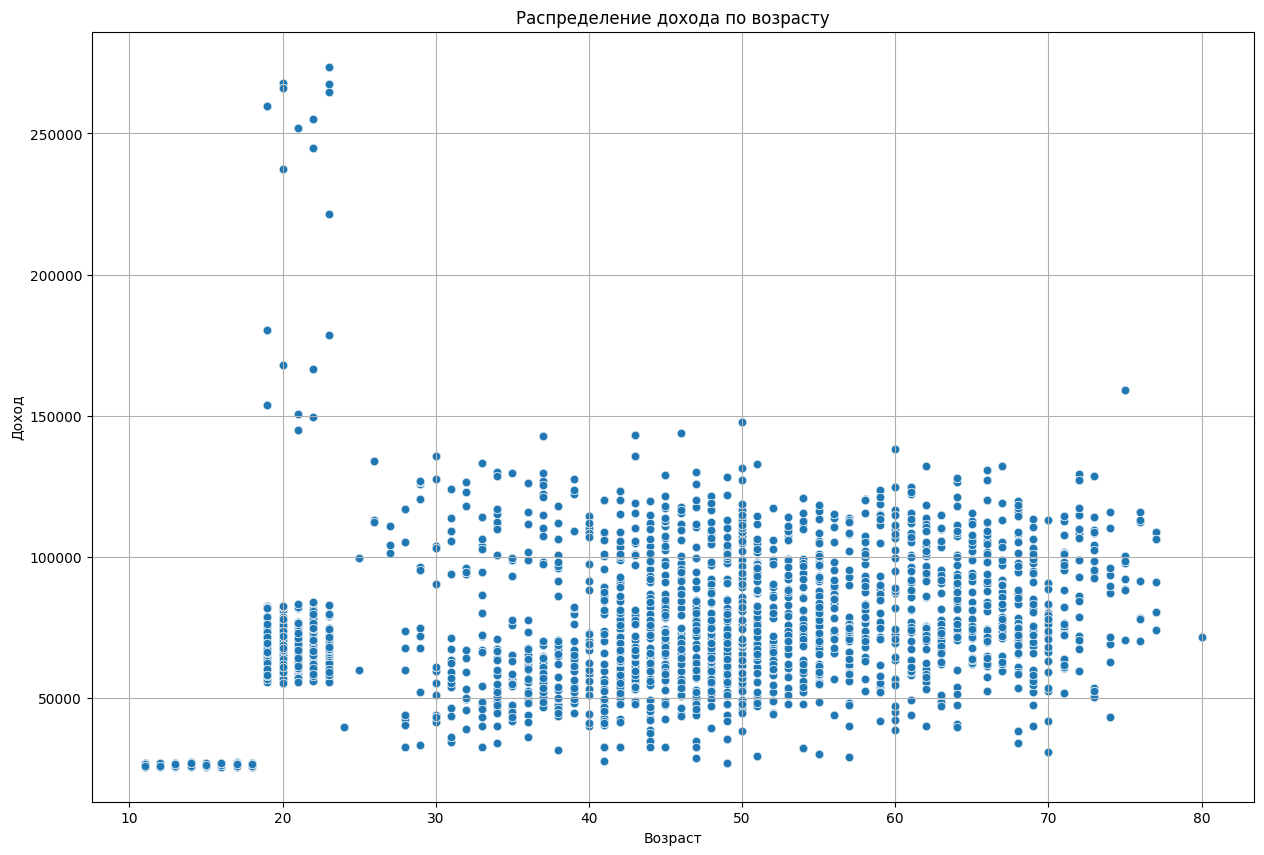

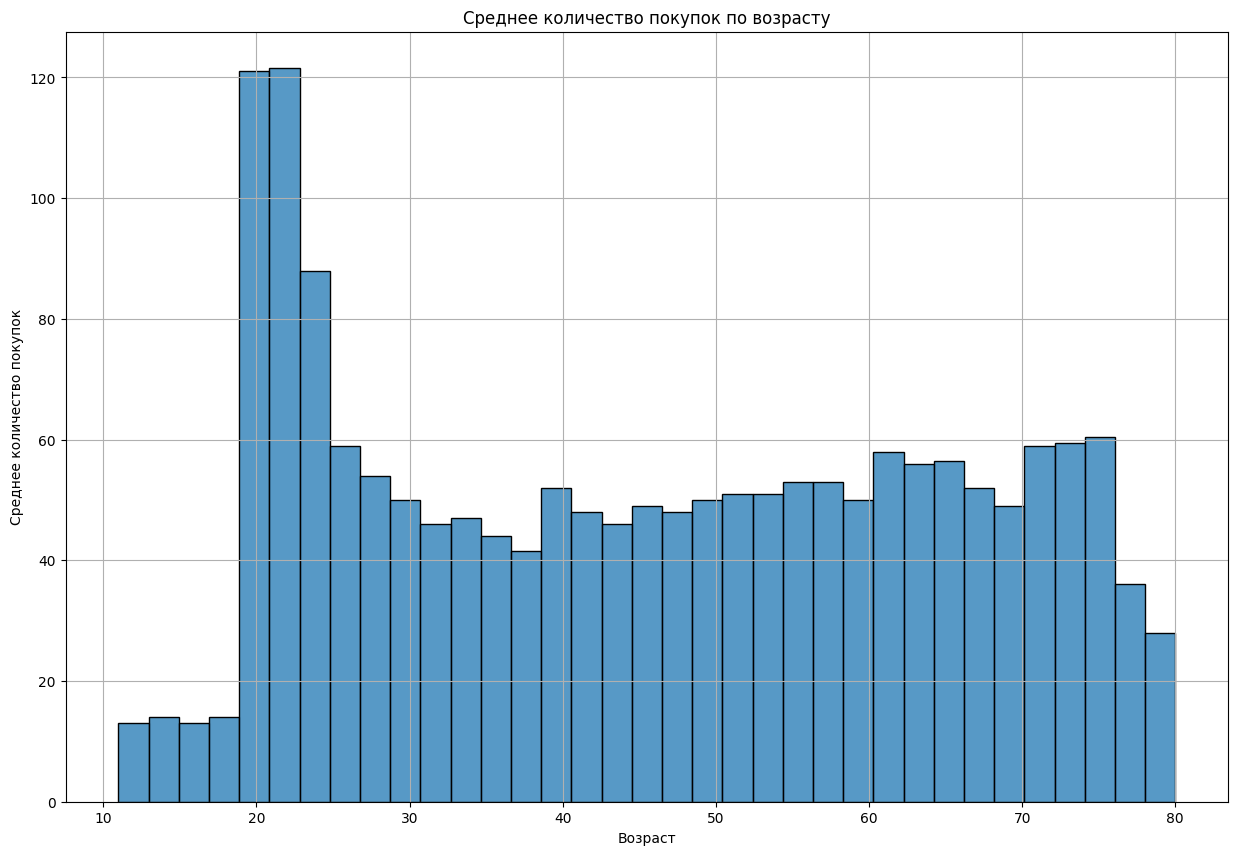

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x='age',
    y='income',
    data=merged_data,
    alpha=0.6
)
plt.title('Распределение дохода по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.grid()

merged_data['total_purchases'] = (
    merged_data['store_purchases_count_avg'] + 
    merged_data['website_purchases_count_avg'] + 
    merged_data['mobile_purchases_count_avg'] + 
    merged_data['discount_purchases_count_avg'] + 
    merged_data['catalogue_purchases_count_avg'] 
)

graph1 = merged_data.groupby('age')['total_purchases'].median().reset_index()


plt.figure(figsize=(15, 10))
sns.histplot(data=graph1, x='age', weights='total_purchases', bins=35, kde=False)
plt.title('Среднее количество покупок по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Среднее количество покупок')
plt.grid()
plt.show()

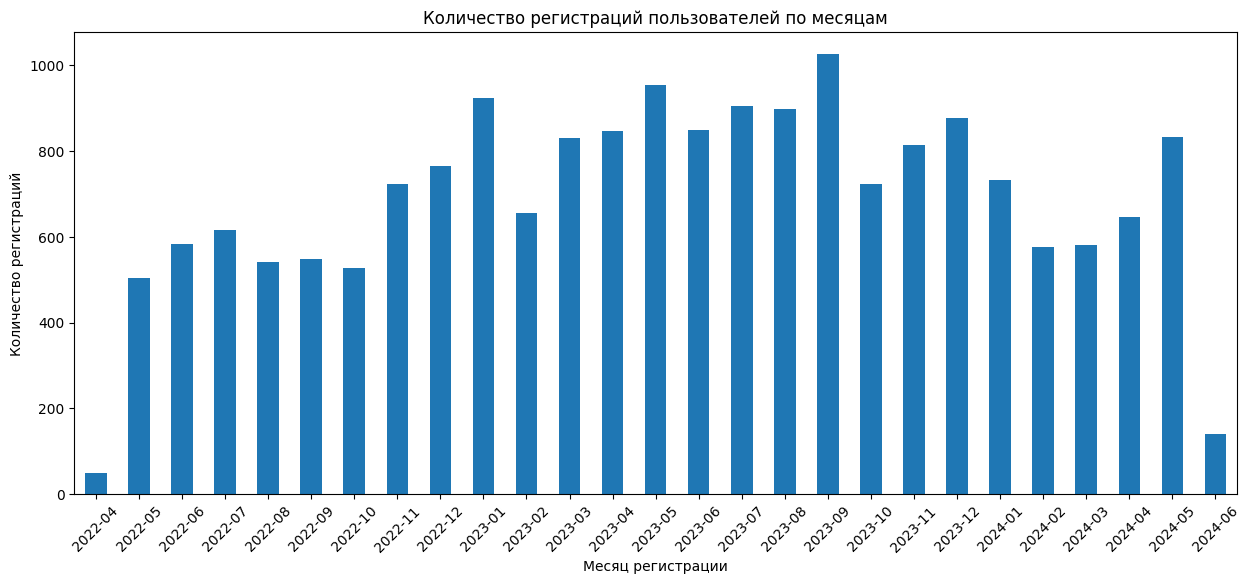

In [46]:
merged_data['join_datetime'] = pd.to_datetime(merged_data['join_datetime'])


merged_data['join_month'] = merged_data['join_datetime'].dt.to_period('M')
registration = merged_data['join_month'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
registration.plot(kind='bar')
plt.title('Количество регистраций пользователей по месяцам')
plt.xlabel('Месяц регистрации')
plt.ylabel('Количество регистраций')
plt.xticks(rotation=45)
plt.show()

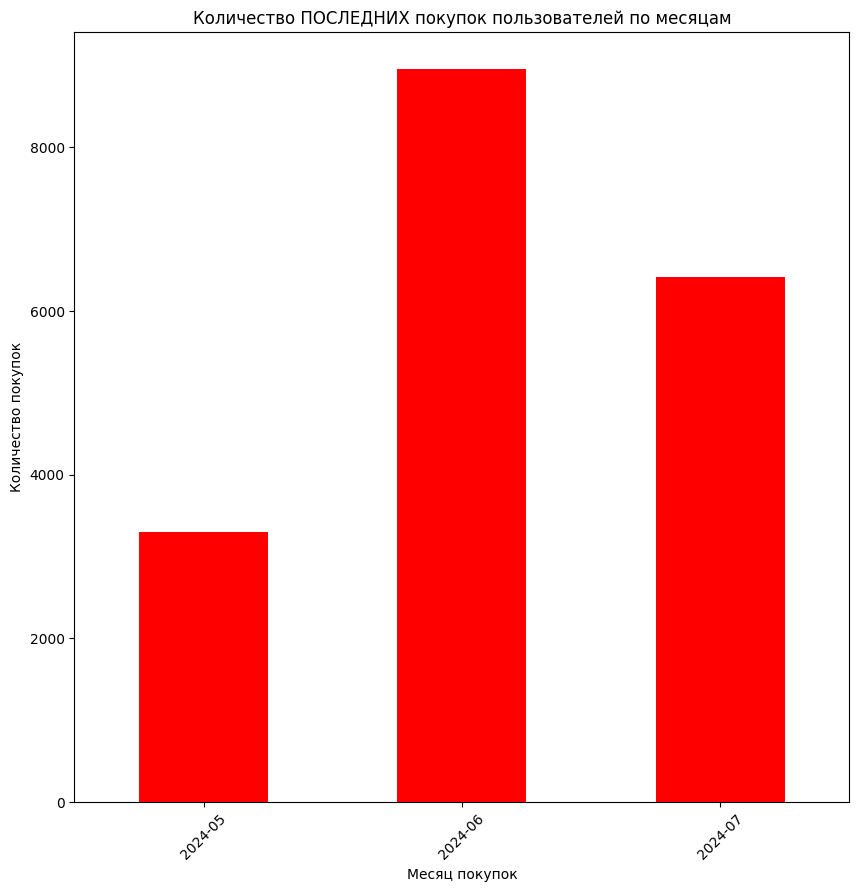

In [47]:
merged_data['last_order_dt'] = pd.to_datetime(merged_data['last_order_dt'])


merged_data['buy_month'] = merged_data['last_order_dt'].dt.to_period('M')
registration = merged_data['buy_month'].value_counts().sort_index()
plt.figure(figsize=(10, 10))
registration.plot(kind='bar', color='red')
plt.title('Количество ПОСЛЕДНИХ покупок пользователей по месяцам')
plt.xlabel('Месяц покупок')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.show()

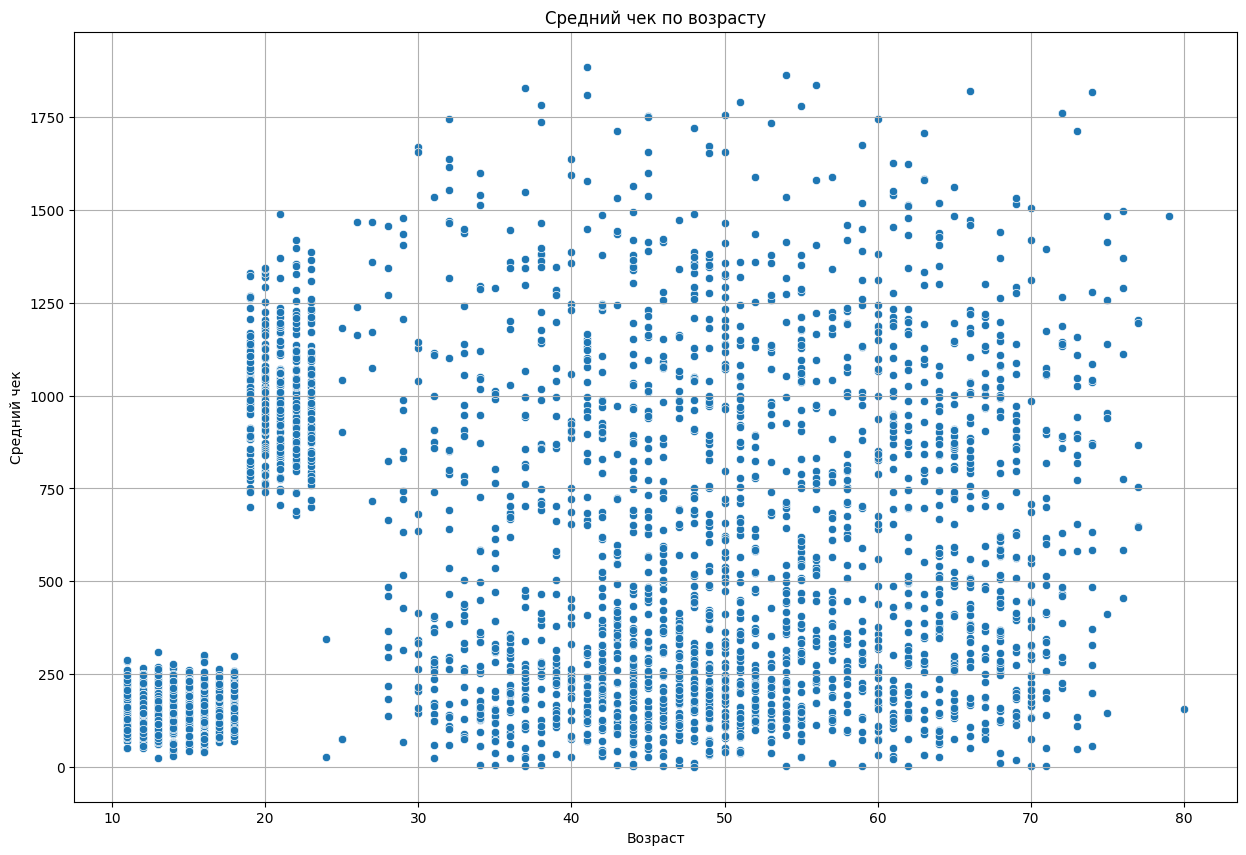

In [48]:
merged_data['total_purchases'] = (
    merged_data['discount_purchases_count_avg'] +
    merged_data['catalogue_purchases_count_avg'] +
    merged_data['store_purchases_count_avg'] +
    merged_data['website_purchases_count_avg'] +
    merged_data['mobile_purchases_count_avg']
)

avg_purchases_by_age = merged_data.groupby('age')['total_purchases'].mean().reset_index()

avg_bill_per_user = orderdata.groupby('userId')['avg_bill'].mean().reset_index()


avg_bill_per_user.rename(columns={'avg_bill': 'avg_bill_user'}, inplace=True)

merged_data = pd.merge(userdata, avg_bill_per_user, on='userId', how='left')


plt.figure(figsize=(15, 10))
sns.scatterplot(x='age', y='avg_bill_user', data=merged_data)
plt.title('Средний чек по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

In [49]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='catalogue_purchases_count_avg', data=merged_data, marker='o')
plt.title('Среднее количество покупок через брошюру по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество покупок через каталог')
plt.grid()
plt.show()


ValueError: Could not interpret value `catalogue_purchases_count_avg` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

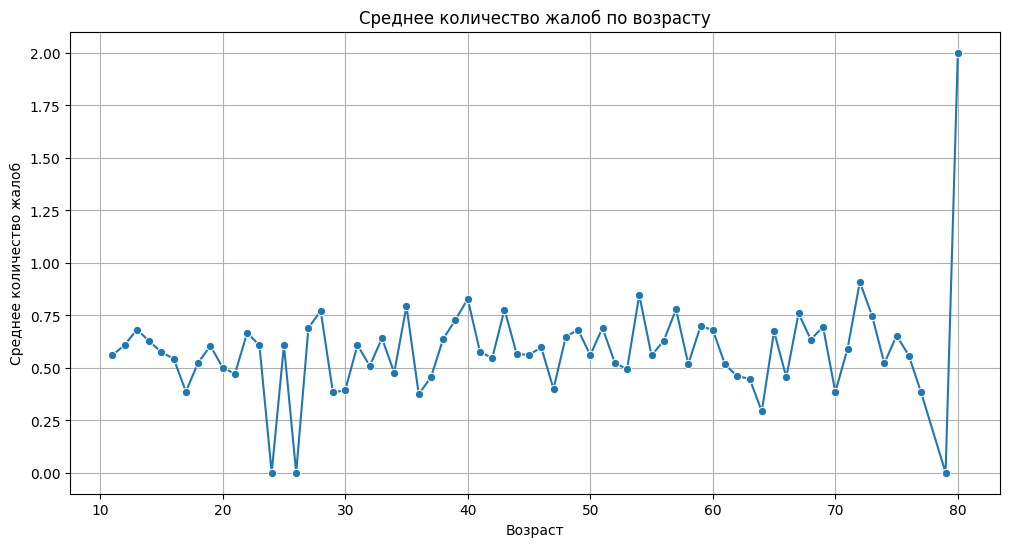

In [ ]:
avg_complaints_by_age = merged_data.groupby('age')['complain_count'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='complain_count', data=avg_complaints_by_age, marker='o')
plt.title('Среднее количество жалоб по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Среднее количество жалоб')
plt.grid()
plt.show()

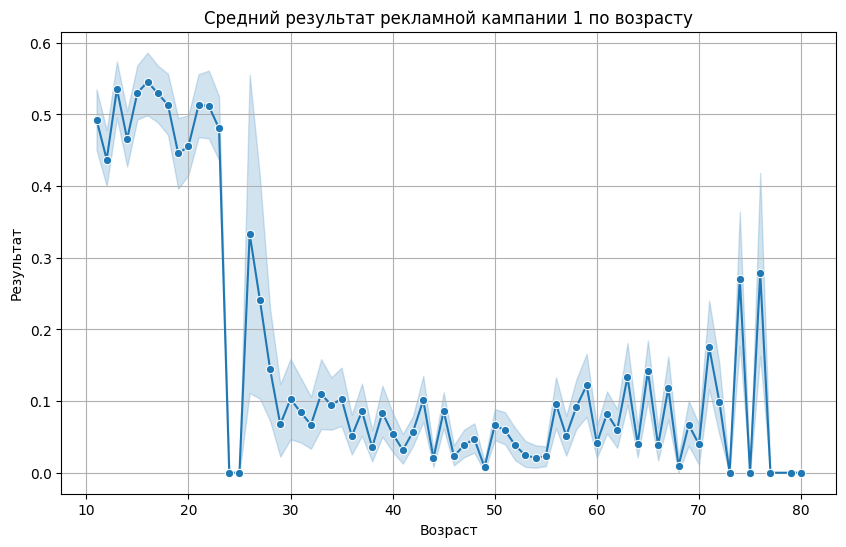

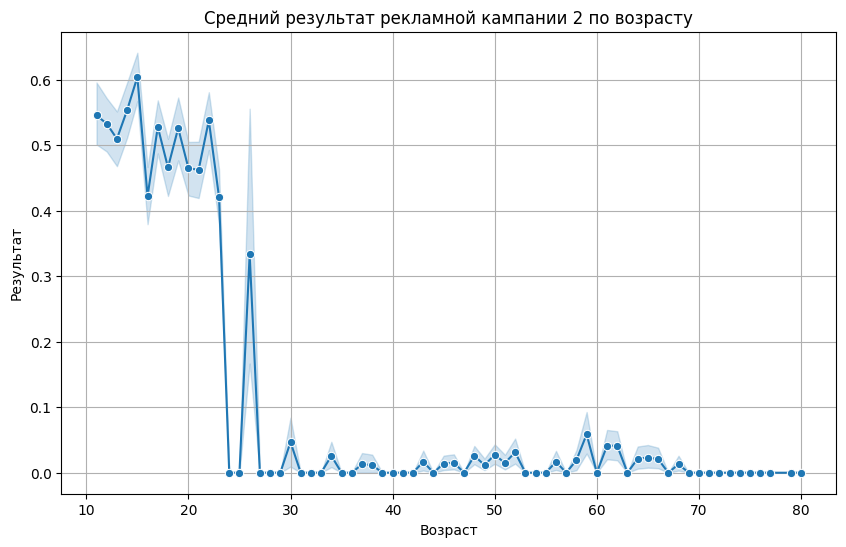

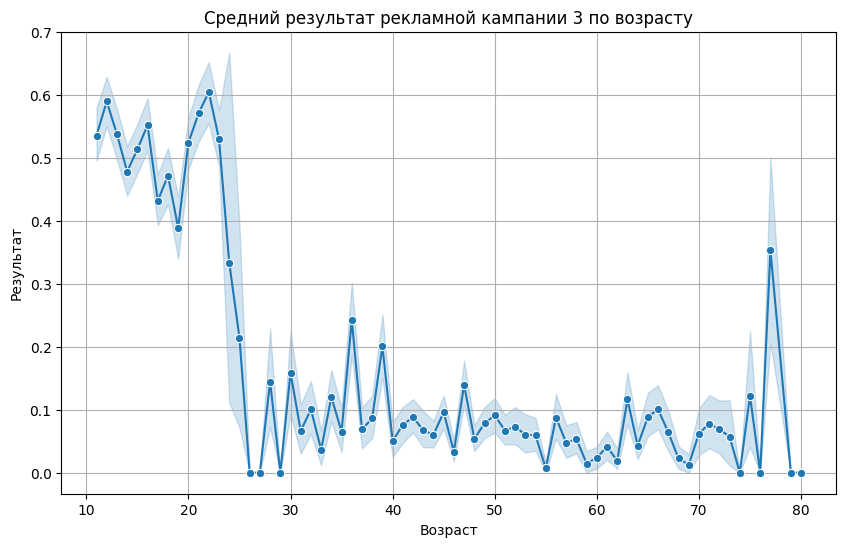

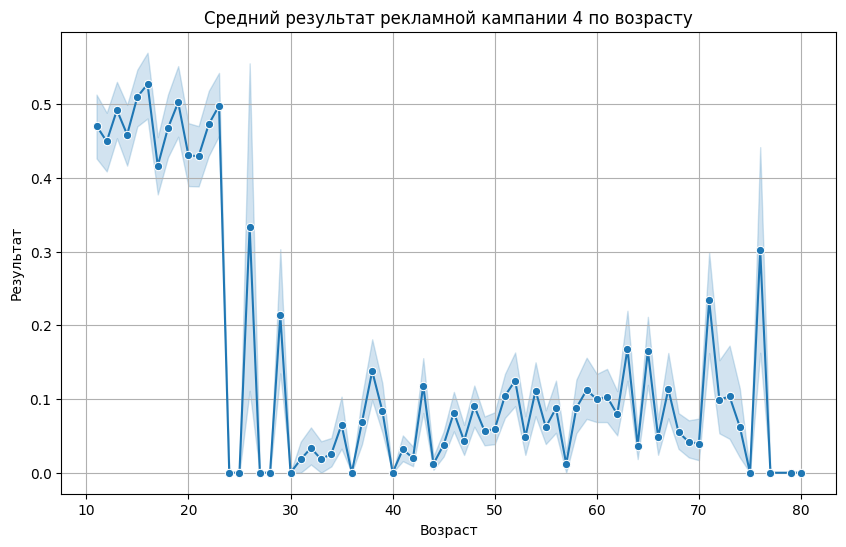

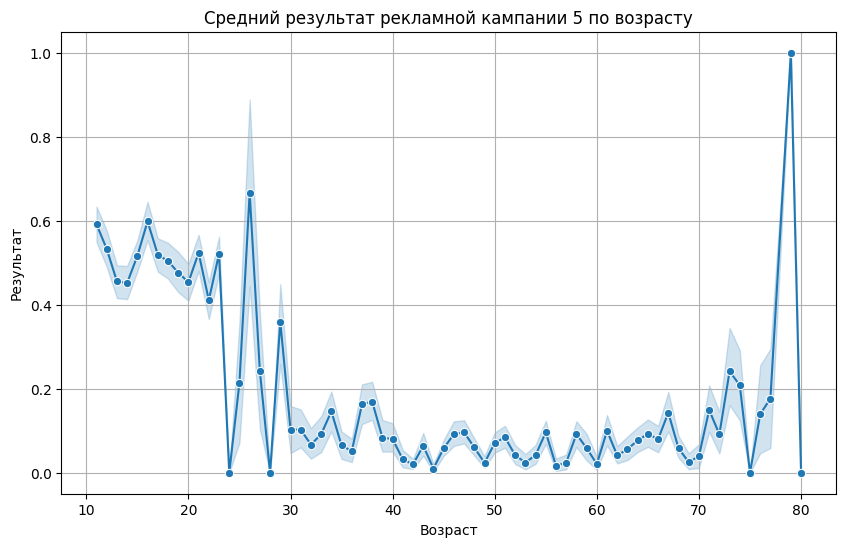

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='marketing_company_outcome_1', data=merged_data, marker='o')
plt.title('Средний результат рекламной кампании 1 по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Результат')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='marketing_company_outcome_2', data=merged_data, marker='o')
plt.title('Средний результат рекламной кампании 2 по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Результат')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='marketing_company_outcome_3', data=merged_data, marker='o')
plt.title('Средний результат рекламной кампании 3 по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Результат')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='marketing_company_outcome_4', data=merged_data, marker='o')
plt.title('Средний результат рекламной кампании 4 по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Результат')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='marketing_company_outcome_5', data=merged_data, marker='o')
plt.title('Средний результат рекламной кампании 5 по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Результат')
plt.grid()
plt.show()

In [ ]:
cnt_purchase = merged_data['category'].value_counts().reset_index()
cnt_purchase.columns = ['Category', 'Purchase Count']

ass = merged_data.groupby('age')['Category']
print(ass)

NameError: name 'merged_data' is not defined

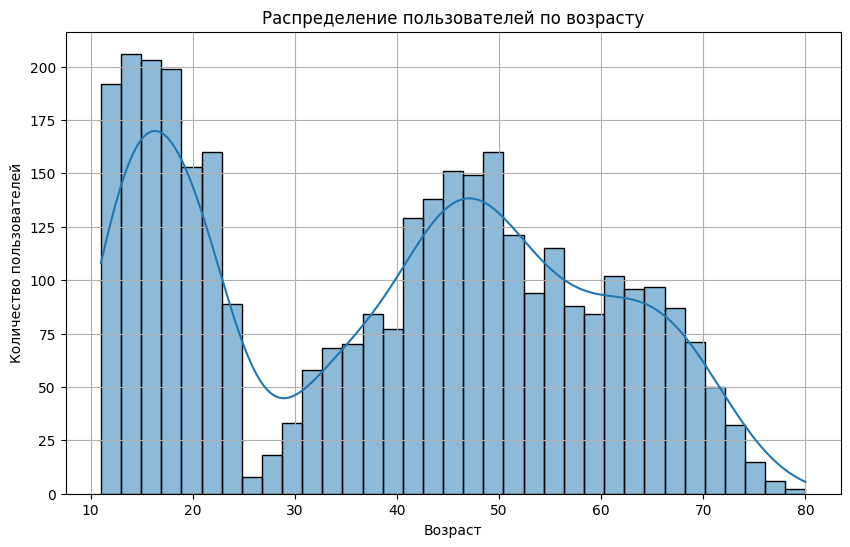

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(userdata['age'], bins=35, kde=True)
plt.title('Распределение пользователей по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

In [ ]:
from tabulate import tabulate

complain_stats = interactiondata['complain_count'].describe()

complain_stats_df = complain_stats.reset_index()
complain_stats_df.columns = ['Статистика', 'Значение']

print(' Информация о количестве жалоб \n')
print(tabulate(complain_stats_df, headers='keys', tablefmt='pipe'))

 Информация о количестве жалоб 

|    | Статистика   |    Значение |
|---:|:-------------|------------:|
|  0 | count        | 3405        |
|  1 | mean         |    0.579736 |
|  2 | std          |    0.825134 |
|  3 | min          |    0        |
|  4 | 25%          |    0        |
|  5 | 50%          |    0        |
|  6 | 75%          |    1        |
|  7 | max          |    8        |


In [ ]:
avg_bill_by_category = orderdata.groupby('category')['avg_bill'].mean().reset_index()

avg_bill_by_category.columns = ['Категория', 'Средний чек']

print(avg_bill_by_category)

    Категория  Средний чек
0     alcohol   906.654648
1        fish   934.783183
2      fruits   696.278721
3        meat   191.630406
4       other   401.029245
5      sweets   152.986559
6  vegetables   827.162869
